# Minimizing Churn Rate Through Analysis of Financial Habits

## Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

## Importing the Dataset

You can download the data from [HERE](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P39-Minimizing-Churn-Data.zip)

In [2]:
dataset = pd.read_csv("churn_data.csv")

In [3]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


## Cleaning the Data

### Removing the NaN

In [4]:
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [5]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [7]:
dataset = dataset[pd.notnull(dataset["age"])]

In [8]:
dataset = dataset.drop(columns=["credit_score", "rewards_earned"])

### Histograms

In [9]:
dataset2 = dataset.drop(columns=["user", "churn"])

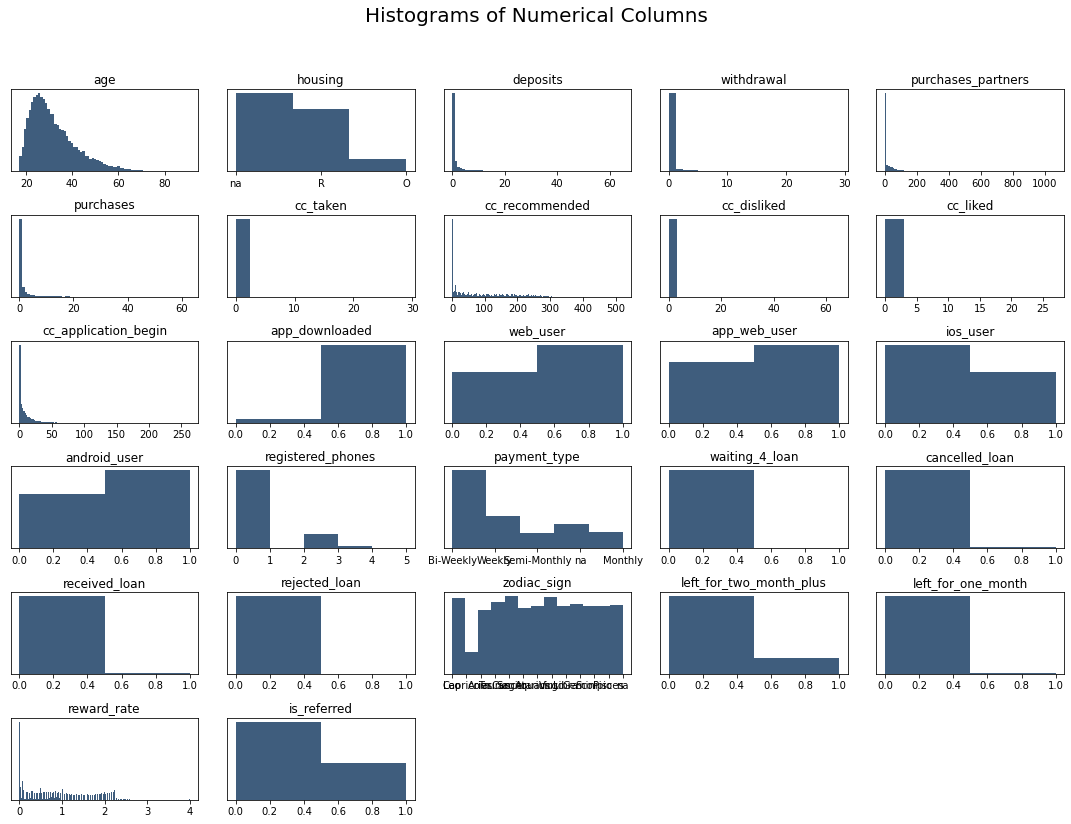

In [10]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle("Histograms of Numerical Columns", fontsize=20)
for i in range(len(dataset2.columns.values)):
    plt.subplot(6, 5, i + 1)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i])
    
    vals = np.size(dataset2.iloc[:, i].unique())
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color="#3f5d7d")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Pie Plots

<ipython-input-13-0122dcf97886>:15: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values, labels=index, autopct="%1.1f%%")


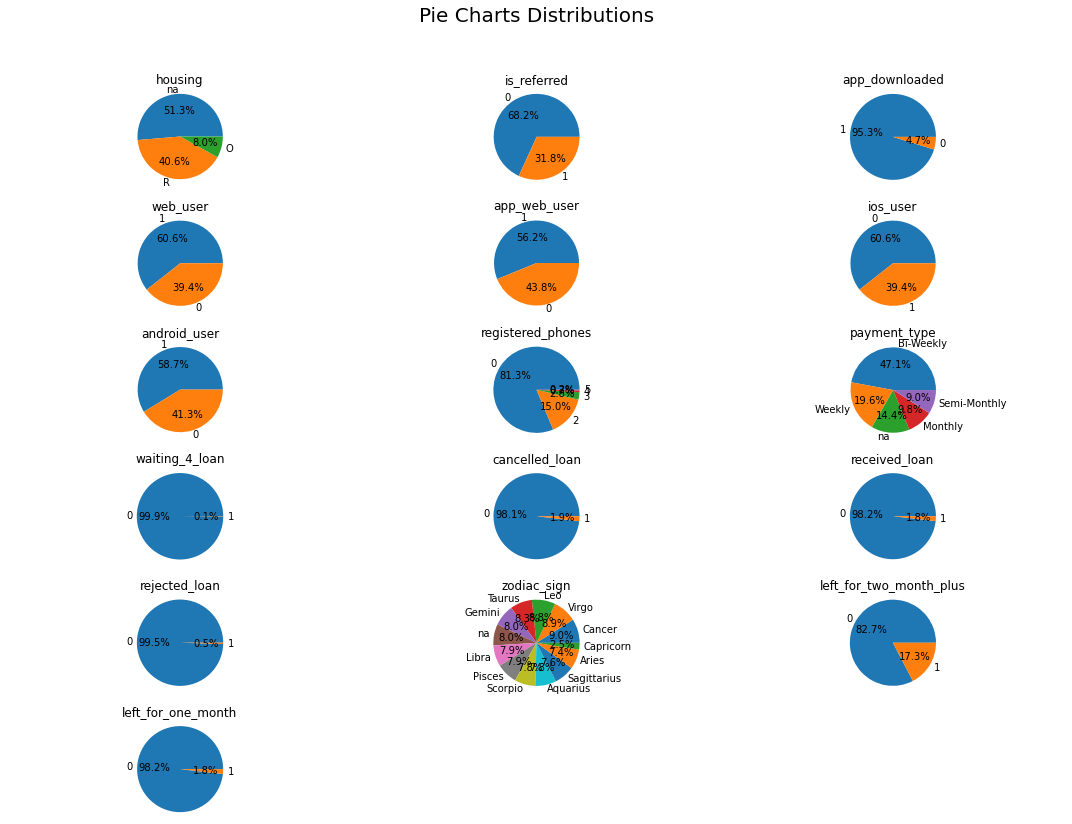

In [13]:
dataset2 = dataset[["housing", "is_referred", "app_downloaded", "web_user", "app_web_user", "ios_user",
                    "android_user", "registered_phones", "payment_type", "waiting_4_loan", "cancelled_loan",
                    "received_loan", "rejected_loan", "zodiac_sign", "left_for_two_month_plus",
                    "left_for_one_month"]]
fig = plt.figure(figsize=(15, 12))
plt.suptitle("Pie Charts Distributions", fontsize=20)
for i in range(len(dataset2.columns.values)):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i])
    values = dataset2.iloc[:, i].value_counts(normalize=True).values
    index = dataset2.iloc[:, i].value_counts(normalize=True).index
    
    plt.pie(values, labels=index, autopct="%1.1f%%")
    plt.axis("equal")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [14]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [15]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [16]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [17]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [18]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

### Exploring Uneven Features

<AxesSubplot:title={'center':'Correlation with Response Variable'}>

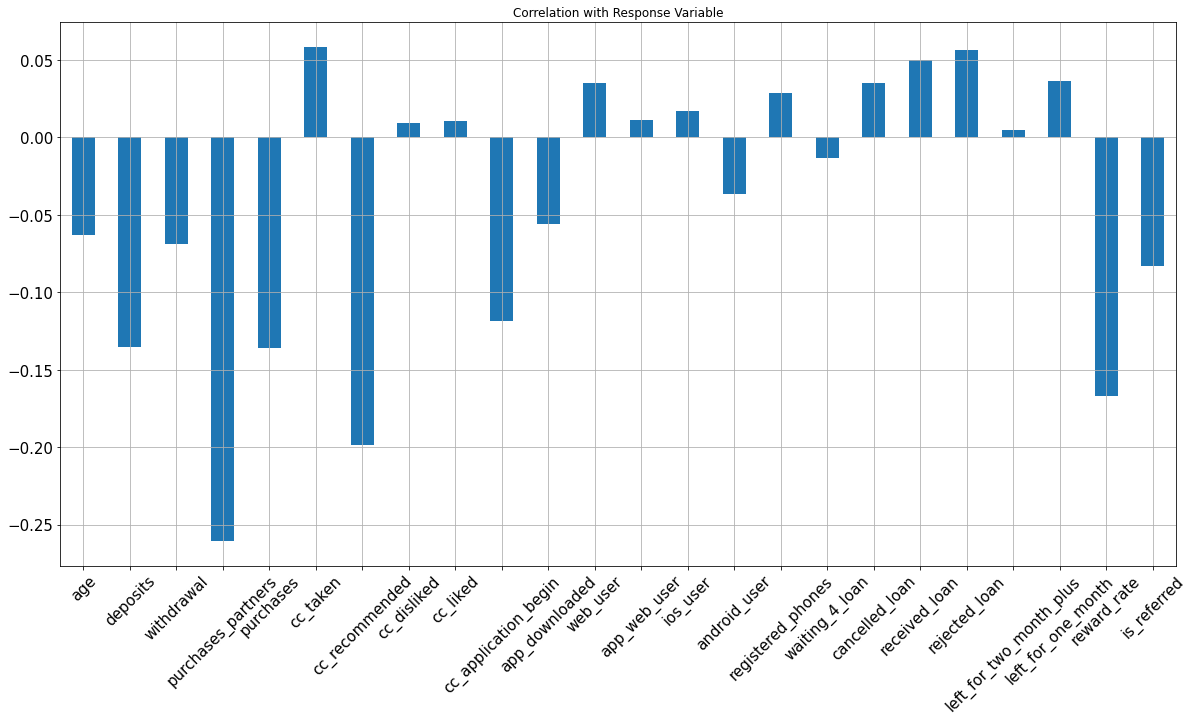

In [21]:
dataset.drop(columns=["churn", "user", "housing",
                      "payment_type", "zodiac_sign"]).corrwith(dataset.churn).plot.bar(figsize=(20, 10),
                                                                                       fontsize=15,
                                                                                       title="Correlation with Response Variable",
                                                                                       rot=45, grid=True)

<AxesSubplot:>

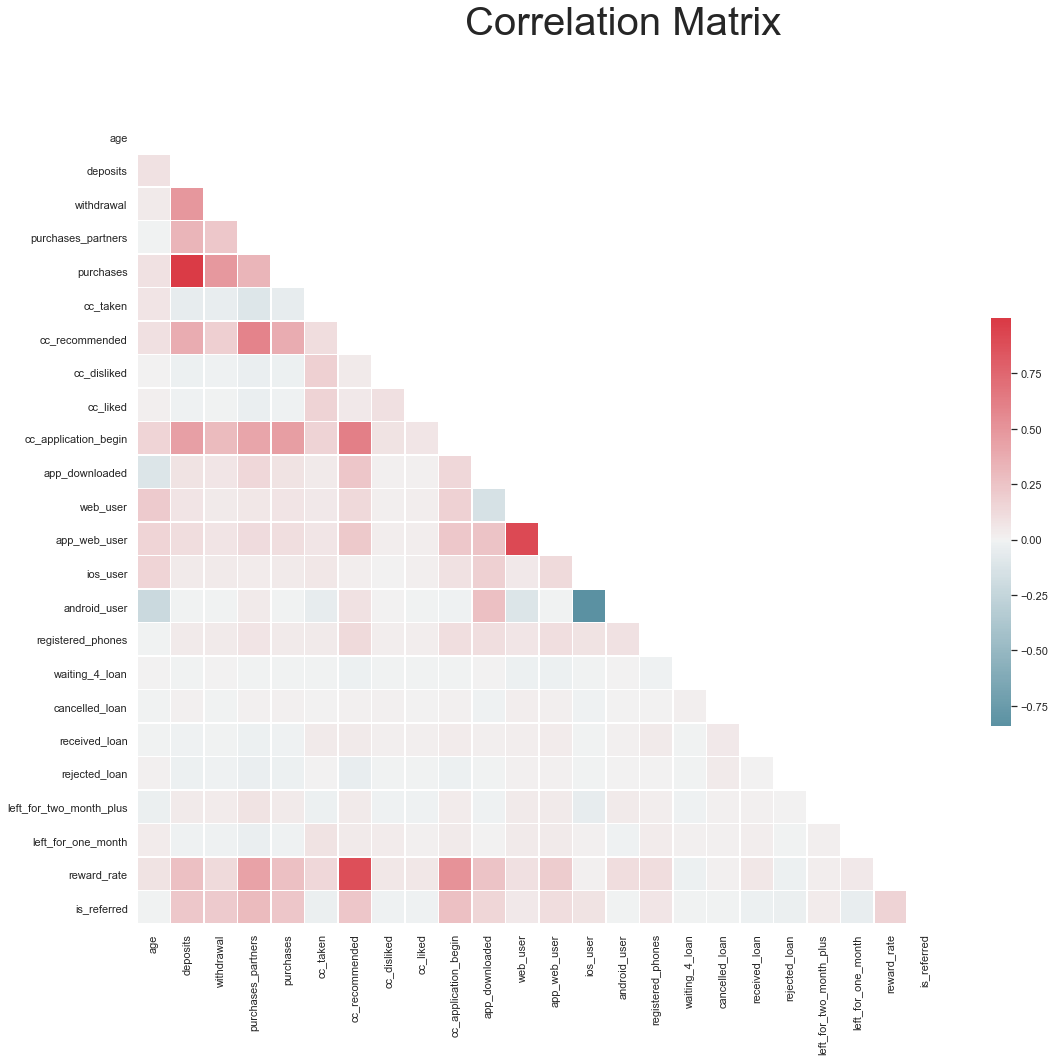

In [22]:
sn.set(style="white")
corr = dataset.drop(columns=["user", "churn"]).corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize=40)
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

In [23]:
dataset = dataset.drop(columns=["app_web_user"])

In [24]:
dataset.to_csv('new_churn_data.csv', index=False)

## Data Preparation

In [25]:
dataset = pd.read_csv('new_churn_data.csv')

In [26]:
user_identifier = dataset.user
dataset = dataset.drop(columns=["user"])

### One-Hot Encoding

In [27]:
dataset = pd.get_dummies(dataset)

In [30]:
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [31]:
dataset = dataset.drop(columns=["housing_na", "zodiac_sign_na", "payment_type_na"])

### Splitting the Dataset into the Training Set and Test Set

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=["churn"]), dataset.churn,
                                                    test_size=0.2, random_state=0)

### Balancing the Training Set

In [33]:
import random
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index
    
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes, :]
y_train = y_train[new_indexes]

### Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [36]:
X_train.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,-0.618146,-0.356619,-0.283778,-0.584834,-0.355850,-0.168934,-0.904902,-0.072451,-0.069043,-0.554575,...,-0.311988,-0.156227,-0.290899,-0.309933,-0.291351,-0.292930,-0.292029,-0.292592,-0.302173,-0.315858
19766,-0.416227,-0.356619,-0.283778,-0.633148,-0.355850,-0.168934,0.325387,1.379827,-0.069043,-0.554575,...,-0.311988,-0.156227,-0.290899,-0.309933,3.432282,-0.292930,-0.292029,-0.292592,-0.302173,-0.315858
8354,0.290490,-0.356619,-0.283778,-0.633148,-0.355850,-0.168934,2.011339,-0.072451,-0.069043,-0.233103,...,-0.311988,-0.156227,-0.290899,-0.309933,-0.291351,-0.292930,-0.292029,-0.292592,-0.302173,3.165980
17883,0.593369,-0.356619,-0.283778,0.043249,-0.355850,-0.168934,-0.175842,-0.072451,-0.069043,0.008001,...,-0.311988,-0.156227,-0.290899,-0.309933,-0.291351,-0.292930,-0.292029,-0.292592,3.309361,-0.315858
25149,-0.820066,-0.240856,-0.283778,-0.101693,-0.237902,-0.168934,-0.574546,-0.072451,-0.069043,-0.233103,...,-0.311988,-0.156227,-0.290899,-0.309933,-0.291351,3.413785,-0.292029,-0.292592,-0.302173,-0.315858


## Model Building

### Fitting Model to the Training Set

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predicting Test Set

In [38]:
y_pred = classifier.predict(X_test)

### Evaluating Results

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[1669 1497]
 [ 581 1653]]
              precision    recall  f1-score   support

           0       0.74      0.53      0.62      3166
           1       0.52      0.74      0.61      2234

    accuracy                           0.62      5400
   macro avg       0.63      0.63      0.62      5400
weighted avg       0.65      0.62      0.62      5400



<AxesSubplot:>

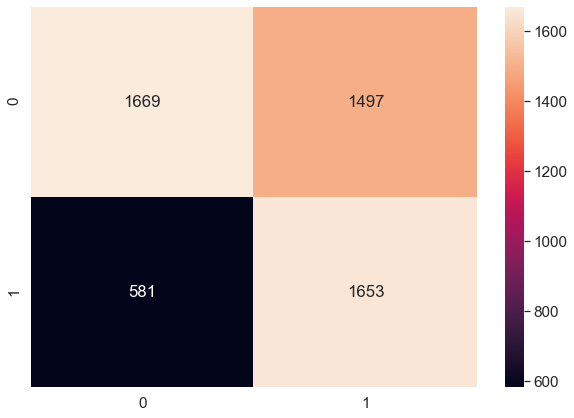

In [40]:
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt="g")

## Applying k-Fold Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print(accuracies.mean())
print(accuracies.std())

0.6442953020134229
0.010959685650036615


## Analyzing Coefficients

In [42]:
pd.concat([pd.DataFrame(X_train.columns, columns=["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns=["coef"])], axis=1)

,features,coef
0,age,-0.164490
1,deposits,0.413498
2,withdrawal,0.064460
3,purchases_partners,-0.725465
4,purchases,-0.550519
5,cc_taken,0.073353
6,cc_recommended,0.051243
7,cc_disliked,-0.004321
8,cc_liked,0.018458
9,cc_application_begin,0.027147


## Feature Selection

In [44]:
from sklearn.feature_selection import RFE
classifier = LogisticRegression()
rfe = RFE(estimator=classifier, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [45]:
print(rfe.support_)

[ True  True  True  True  True  True  True False False False False  True
  True False  True False  True  True  True  True  True  True False False
 False  True  True  True False  True False False False False False False
 False False False False False]


In [46]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'zodiac_sign_Aquarius'],
      dtype='object')

In [47]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 18, 10,  5, 22,  1,  1,  3,  1,  7,  1,
        1,  1,  1,  1,  1, 11, 21,  2,  1,  1,  1, 13,  1,  9, 12,  4, 16,
       19, 20,  8, 17, 15,  6, 14])

[[1647 1519]
 [ 582 1652]]
              precision    recall  f1-score   support

           0       0.74      0.52      0.61      3166
           1       0.52      0.74      0.61      2234

    accuracy                           0.61      5400
   macro avg       0.63      0.63      0.61      5400
weighted avg       0.65      0.61      0.61      5400



<AxesSubplot:>

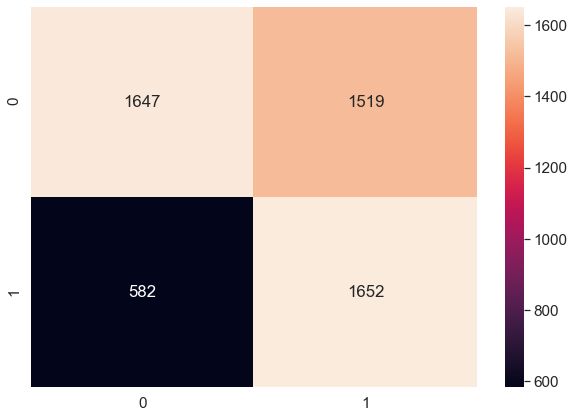

In [48]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(10, 7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt="g")

In [49]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns=["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns=["coef"])], axis=1)

,features,coef
0,age,-0.164477
1,deposits,0.402186
2,withdrawal,0.070422
3,purchases_partners,-0.725471
4,purchases,-0.530869
5,cc_taken,0.081463
6,cc_recommended,0.077832
7,web_user,0.131834
8,ios_user,0.091502
9,registered_phones,0.116193


## Formatting Final Results

In [50]:
final_results = pd.concat([y_test, user_identifier], axis=1).dropna()
final_results["predicted_churn"] = y_pred
final_results = final_results[["user", "churn", "predicted_churn"]].reset_index(drop=True)

In [51]:
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,1
5396,24291,1.0,1
5397,23740,0.0,1
5398,47663,1.0,0
